# Looking at Switchiness

I call the genes that are associated with tumor tissue, independent of proliferation as exhibiting switchiness. The idea is that rather than just being associated with growth, these signals switch on at some point in the process of tumoregenesis. We can't say they this is a causal signal of cancer, but we have a bit we have a bit more evidence that these signals play a role in the tranformation of the tumor cell as opposed to being bystander processes that reflect the increased flux through growth and proliferation pathways. 

In [1]:
import NotebookImport
from metaPCNA import *

importing IPython notebook from metaPCNA

importing IPython notebook from Imports

importing IPython notebook from Global_Parameters

In [36]:
pcna_corr.name = 'PCNA corr'

In [2]:
f_win.order().head()

GPM6B     -0.38
SFRP1     -0.38
PIK3C2G   -0.36
PKHD1L1   -0.36
SCNN1B    -0.36
Name: fraction overexpressed\n(detrended), dtype: float64

In [3]:
f_win.order().tail()

LOC283914    0.41
CST2         0.42
C16orf13     0.43
GABRD        0.47
SEMA5B       0.48
Name: fraction overexpressed\n(detrended), dtype: float64

In [4]:
pcna_win.order().tail()

KIF23     0.43
ZNF488    0.44
CDC25A    0.45
VRK1      0.47
GMNN      0.49
Name: meta-PCNA\n(detrended), dtype: float64

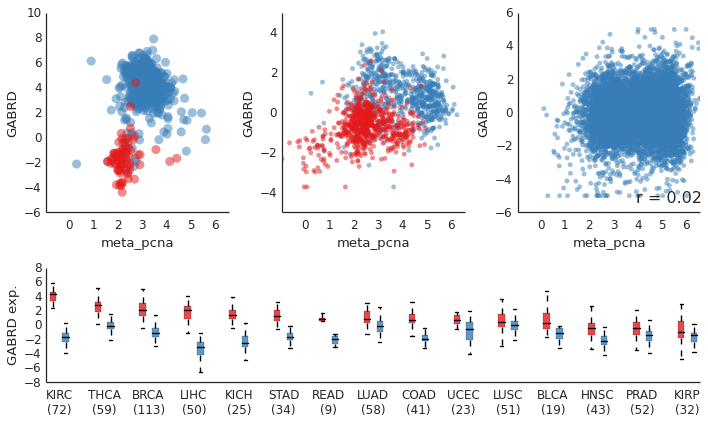

In [5]:
switch_plot('GABRD')

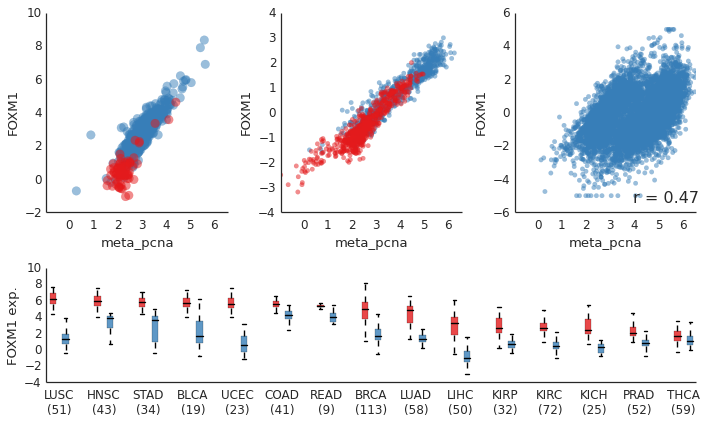

In [6]:
switch_plot('FOXM1')

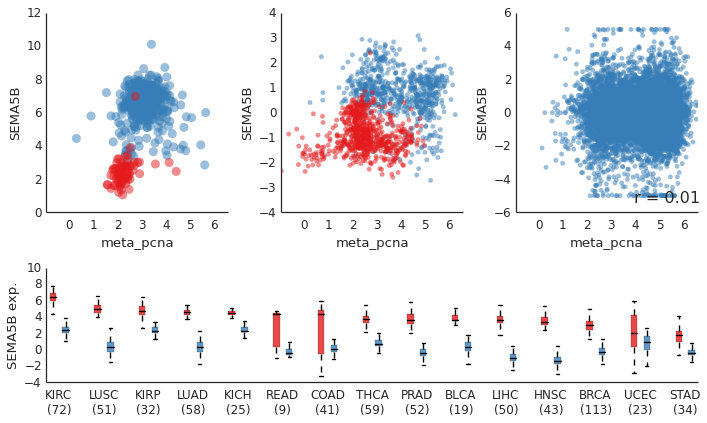

In [7]:
switch_plot('SEMA5B')

In [29]:
gs2 = gene_sets.ix[f_win.dropna().index].fillna(0)
rr = screen_feature(f_win, rev_kruskal, gs2.T, 
                    align=False)
fp = (1.*gene_sets.T * f_win).T.dropna().replace(0, np.nan).mean().order()
fp.name = 'mean score'

In [30]:
(rr.q < .00001).value_counts()

False    1271
True       59
dtype: int64

Greedy filter based on p-value

In [31]:
f2 = fp.ix[ti(rr.q < .0001)]
ff_u = filter_pathway_hits(rr.ix[ti(f2>0)].p.order(), gs2)
ff_p = filter_pathway_hits(rr.ix[ti(f2<0)].p.order(), gs2)
ff = ff_u.append(ff_p)

selected = rr.ix[ff[ff < .00001].index].join(fp)
selected.sort('p')

,H,p,q,mean score
REACTOME_TRANSLATION,158.08,2.97e-36,3.86e-33,0.13
KEGG_SYSTEMIC_LUPUS_ERYTHEMATOSUS,82.42,1.10e-19,1.22e-17,0.10
KEGG_FATTY_ACID_METABOLISM,42.00,9.14e-11,5.79e-09,-0.13
REACTOME_INTERFERON_ALPHA_BETA_SIGNALING,41.59,1.13e-10,6.81e-09,0.11
KEGG_LYSOSOME,38.06,6.86e-10,3.51e-08,0.07
REACTOME_GENERIC_TRANSCRIPTION_PATHWAY,34.89,3.48e-09,1.36e-07,-0.03
REACTOME_VIF_MEDIATED_DEGRADATION_OF_APOBEC3G,34.13,5.16e-09,1.96e-07,0.09
REACTOME_ASPARAGINE_N_LINKED_GLYCOSYLATION,29.17,6.63e-08,1.76e-06,0.07
REACTOME_EXTRACELLULAR_MATRIX_ORGANIZATION,21.82,2.99e-06,5.45e-05,0.08


Greedy filter based on effect size

In [32]:
f2 = fp.ix[ti(rr.q < .0001)]
ff_u = filter_pathway_hits(fp.ix[ti(f2>0)].order()[::-1], gs2)
ff_p = filter_pathway_hits(fp.ix[ti(f2<0)].order(), gs2)
ff = ff_u.append(ff_p)

selected = rr.ix[ff.index].join(f2)
selected.sort('p')

,H,p,q,mean score
KEGG_RIBOSOME,144.04,3.47e-33,1.16e-30,0.16
REACTOME_PACKAGING_OF_TELOMERE_ENDS,45.35,1.65e-11,1.15e-09,0.12
KEGG_FATTY_ACID_METABOLISM,42.00,9.14e-11,5.79e-09,-0.13
KEGG_LYSOSOME,38.06,6.86e-10,3.51e-08,0.07
KEGG_GRAFT_VERSUS_HOST_DISEASE,35.52,2.52e-09,1.05e-07,0.11
REACTOME_GENERIC_TRANSCRIPTION_PATHWAY,34.89,3.48e-09,1.36e-07,-0.03
KEGG_PROTEASOME,31.14,2.40e-08,7.43e-07,0.09
REACTOME_N_GLYCAN_TRIMMING_IN_THE_ER_AND_CALNEXIN_CALRETICULIN_CYCLE,24.76,6.48e-07,1.35e-05,0.18
REACTOME_EXTRACELLULAR_MATRIX_ORGANIZATION,21.82,2.99e-06,5.45e-05,0.08


I am pulling Ribosome as the top hit because it has the largest effect size of a few very significant gene sets. 

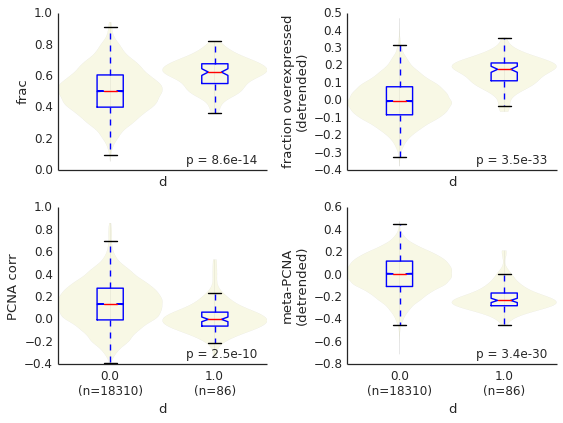

In [37]:
p = gs2['KEGG_RIBOSOME']
fig, axs = subplots(2,2, figsize=(8,6), sharex=True)
axs = axs.flatten()
violin_plot_pandas(p, dx_rna.frac, ax=axs[0])
violin_plot_pandas(p, pcna_corr, ax=axs[2])
violin_plot_pandas(p, f_win, ax=axs[1])
violin_plot_pandas(p, pcna_win, ax=axs[3])
for ax in axs:
    prettify_ax(ax)
fig.tight_layout()

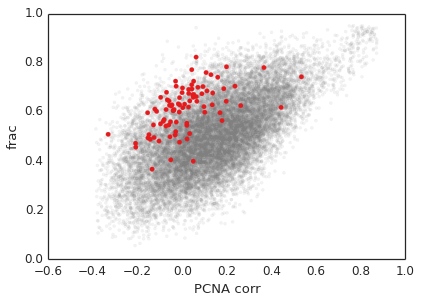

In [38]:
fig, ax = subplots()
series_scatter(pcna_corr.ix[ti(p==0)], dx_rna.frac, color='grey', 
               s=10, alpha=.1, ax=ax, ann=None)
series_scatter(pcna_corr.ix[ti(p>0)], dx_rna.frac, color=colors[0], ax=ax,
               alpha=1, s=20, ann=None)

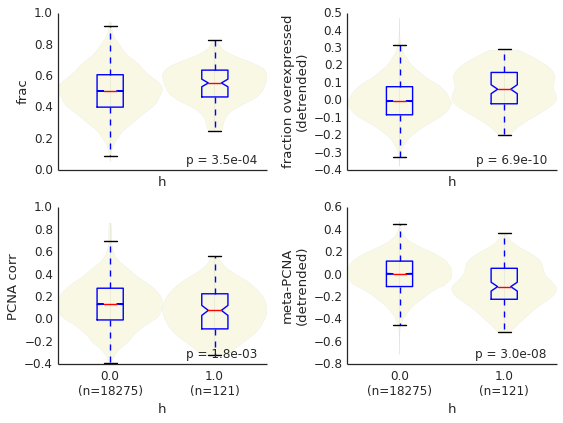

In [39]:
p = gs2['KEGG_LYSOSOME']
fig, axs = subplots(2,2, figsize=(8,6), sharex=True)
axs = axs.flatten()
violin_plot_pandas(p, dx_rna.frac, ax=axs[0])
violin_plot_pandas(p, pcna_corr, ax=axs[2])
violin_plot_pandas(p, f_win, ax=axs[1])
violin_plot_pandas(p, pcna_win, ax=axs[3])
for ax in axs:
    prettify_ax(ax)
fig.tight_layout()

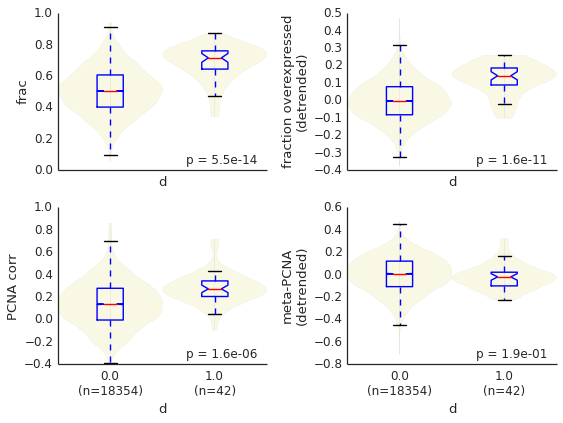

In [40]:
p = gs2['REACTOME_PACKAGING_OF_TELOMERE_ENDS']
fig, axs = subplots(2,2, figsize=(8,6), sharex=True)
axs = axs.flatten()
violin_plot_pandas(p, dx_rna.frac, ax=axs[0])
violin_plot_pandas(p, pcna_corr, ax=axs[2])
violin_plot_pandas(p, f_win, ax=axs[1])
violin_plot_pandas(p, pcna_win, ax=axs[3])
for ax in axs:
    prettify_ax(ax)
fig.tight_layout()

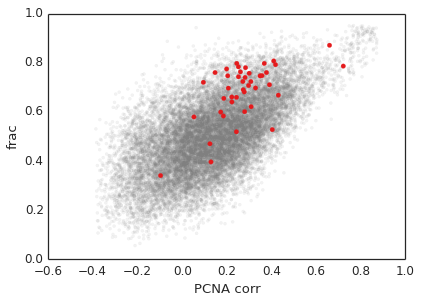

In [41]:
fig, ax = subplots()
series_scatter(pcna_corr.ix[ti(p==0)], dx_rna.frac, color='grey', 
               s=10, alpha=.1, ax=ax, ann=None)
series_scatter(pcna_corr.ix[ti(p>0)], dx_rna.frac, color=colors[0], ax=ax,
               alpha=1, s=20, ann=None)

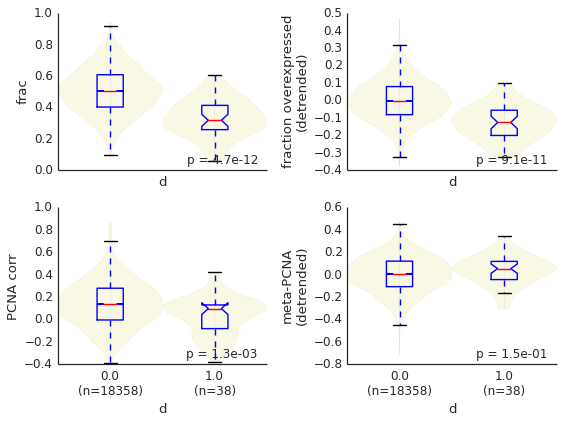

In [42]:
p = gs2['KEGG_FATTY_ACID_METABOLISM']
fig, axs = subplots(2,2, figsize=(8,6), sharex=True)
axs = axs.flatten()
violin_plot_pandas(p, dx_rna.frac, ax=axs[0])
violin_plot_pandas(p, pcna_corr, ax=axs[2])
violin_plot_pandas(p, f_win, ax=axs[1])
violin_plot_pandas(p, pcna_win, ax=axs[3])
for ax in axs:
    prettify_ax(ax)
fig.tight_layout()

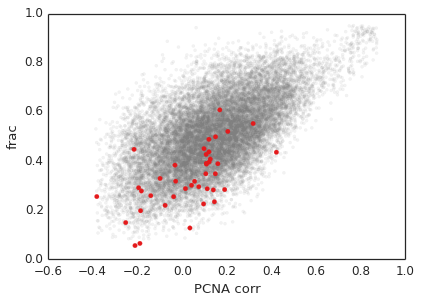

In [43]:
fig, ax = subplots()
series_scatter(pcna_corr.ix[ti(p==0)], dx_rna.frac, color='grey', 
               s=10, alpha=.1, ax=ax, ann=None)
series_scatter(pcna_corr.ix[ti(p>0)], dx_rna.frac, color=colors[0], ax=ax,
               alpha=1, s=20, ann=None)

The histone genes are not in our gene sets, but some fishing around showed that they are overexpressed in the tumor much more than their proliferation scores would suggest.

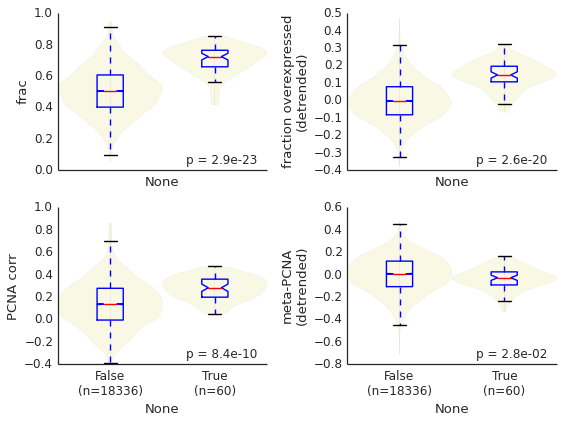

In [44]:
g = pd.Series(f_win.index, f_win.index)
p = g.str.startswith('HIST')
fig, axs = subplots(2,2, figsize=(8,6), sharex=True)
axs = axs.flatten()
violin_plot_pandas(p, dx_rna.frac, ax=axs[0])
violin_plot_pandas(p, pcna_corr, ax=axs[2])
violin_plot_pandas(p, f_win, ax=axs[1])
violin_plot_pandas(p, pcna_win, ax=axs[3])
for ax in axs:
    prettify_ax(ax)
fig.tight_layout()